In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import datetime 
from datetime import timedelta
import pytz
from pytz import timezone
from numpy import load
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import h5py
import pylab
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import librosa
import matplotlib.dates as md
import sys
import scipy

In [2]:
sys.path.insert(1, '../modules')
import data
import display

In [3]:
df = pd.read_csv('../output/june_2019_df.csv')

In [4]:
df.head()

,Unnamed: 0,dBAS,assignment,median_dBAS
0,2019-06-01 00:00:42-04:00,63.53,2.0,67.140
1,2019-06-01 00:00:43-04:00,63.73,2.0,65.640
2,2019-06-01 00:00:44-04:00,64.94,2.0,65.555
3,2019-06-01 00:00:45-04:00,63.09,2.0,64.720
4,2019-06-01 00:00:46-04:00,61.66,2.0,64.595


In [5]:
df.dtypes

Unnamed: 0      object
dBAS           float64
assignment     float64
median_dBAS    float64
dtype: object

Convert index to datetime format

In [6]:
df = df.set_index(pd.to_datetime(df.iloc[:, 0]))

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df = df.tz_convert('US/Eastern')

In [9]:
del df.index.name

In [10]:
df.head()

,dBAS,assignment,median_dBAS
2019-06-01 00:00:42-04:00,63.53,2.0,67.140
2019-06-01 00:00:43-04:00,63.73,2.0,65.640
2019-06-01 00:00:44-04:00,64.94,2.0,65.555
2019-06-01 00:00:45-04:00,63.09,2.0,64.720
2019-06-01 00:00:46-04:00,61.66,2.0,64.595


# Example Plots

Plots SPL level in green, the shaded parts correspond to audio that is grouped into trucks (red) and non-trucks (gray). SPL peaks are plotted with dots in the same color scheme.

/home/cusp/meh708/.conda/envs/redhook_analysis_storage/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


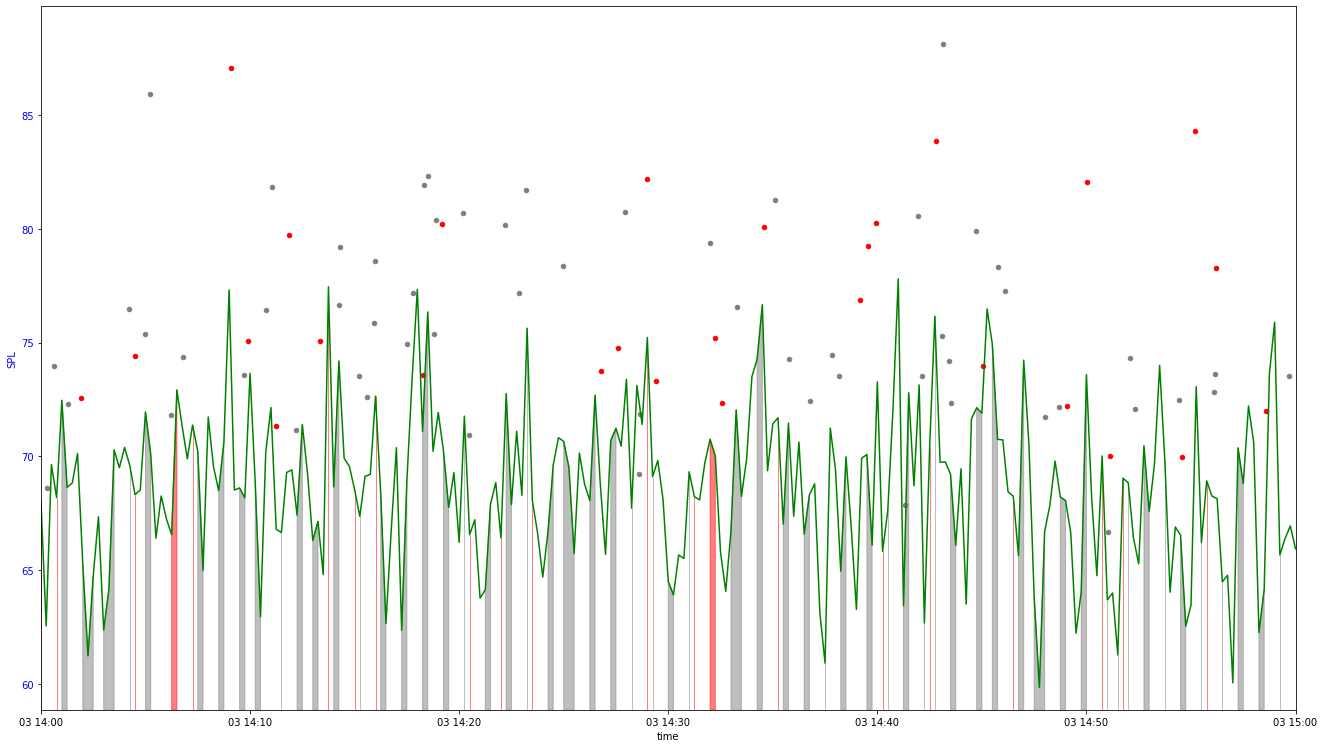

In [11]:
display.plot_truck_clusters_first(df['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            7, 11, 15, 'mean').show()

Plots SPL level in green, the shaded parts correspond to audio that is grouped into trucks (red) and non-trucks (gray). SPL peaks are plotted with dots in the same color scheme. The median SPL over the specificed time period is plotted in blue.

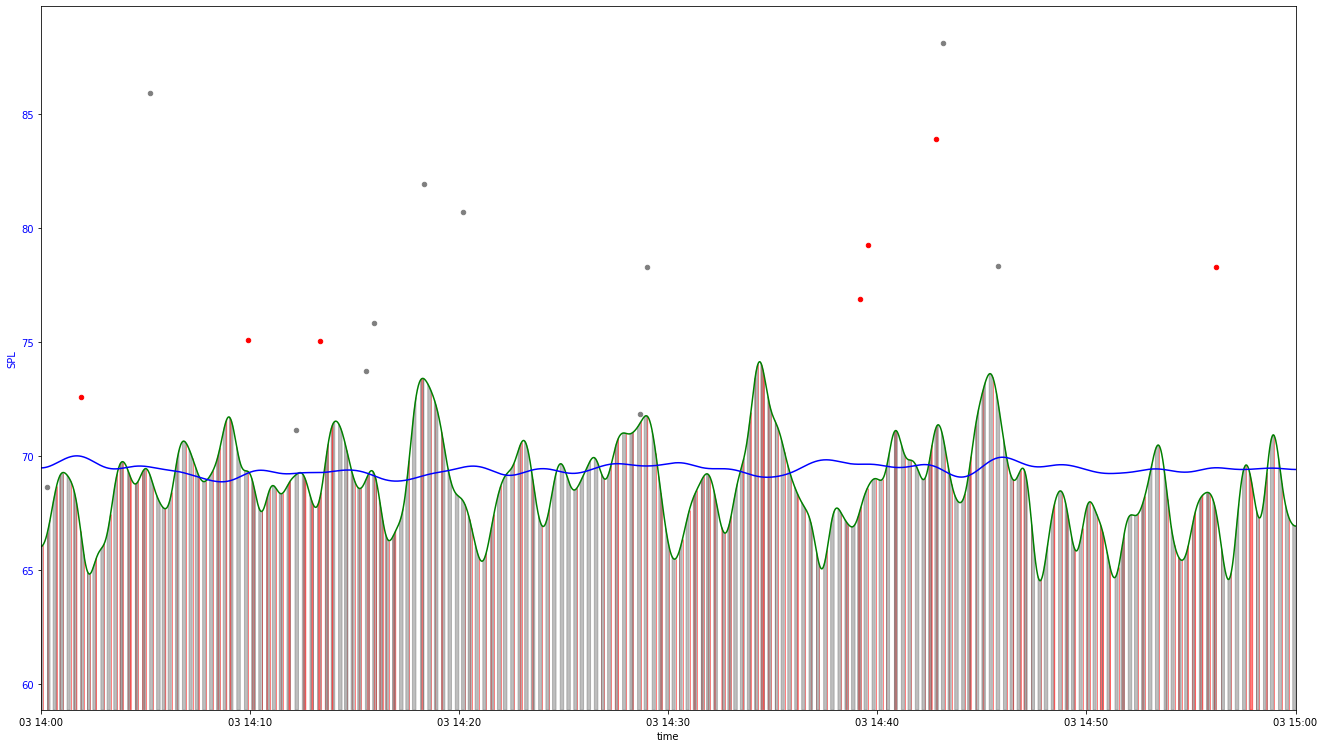

In [12]:
display.plot_truck_clusters_median(df['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            3, 20, 50, 1, 'gaussian').show()

Plots SPL level in green, the shaded parts correspond to audio that is grouped into trucks (red) and non-trucks (gray). SPL peaks are plotted with dots in the same color scheme. The median SPL over the specificed time period is plotted in blue. There is only shading when the actual SPL is greater than the median SPL.

In [ ]:
display.plot_truck_clusters_median_shading(df['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            3, 20, 50, 1, 'gaussian').show()

Plots SPL level in green, the shaded parts correspond to audio that is grouped into trucks (red) and non-trucks (gray). SPL peaks are plotted with dots in the same color scheme. The median SPL over the specificed time period is plotted in blue. There is only shading when the actual SPL is greater than the median SPL. This figure is tailored to present to an audience.

In [ ]:
display.plot_truck_clusters_final(df['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            3, 20, 50, 1, 'gaussian').show()

Plots the SPL normalized to the median SPL (in other words, the difference between the actual SPL and the median SPL). The SPL level is in green, the shaded parts correspond to audio that is grouped into trucks (red) and non-trucks (gray). SPL peaks are plotted with dots in the same color scheme.

In [ ]:
display.plot_truck_clusters_normalized(df['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            3, 20, 50, 1, 'gaussian').show()

Plots the SPL normalized to the median SPL (in other words, the difference between the actual SPL and the median SPL), but only when the sound at that second corresponds to a truck as determined by the clustering.

In [ ]:
display.plot_truck_clusters_normalized_final(df['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            3, 20, 50, 1, 'gaussian').show()